In [1]:
!ls data 

dataset_1.csv
dataset_1_key.csv
dataset_1_key_with_population.csv
New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv
nyc-population.csv
nynta.csv


In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("data/dataset_1_key_with_population.csv")
df

,Unnamed: 0,station_id,station_name,station_latitude,station_longitude,ntaPopulation,ntaCode,noStationsInNTA,ntaNormPopulation,binGroup,binIndexLat,binIndexLong,NTACode,Shape_Area,density
0,0,72,W 52 St & 11 Ave,40.767272,-73.993929,45884,MN15,15,3058.933333,1168,40.766771,-73.991899,MN15,1.836215e+07,166.589068
1,1,448,W 37 St & 10 Ave,40.756604,-73.997901,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068
2,2,449,W 52 St & 9 Ave,40.764618,-73.987895,45884,MN15,15,3058.933333,1128,40.762477,-73.987202,MN15,1.836215e+07,166.589068
3,3,478,11 Ave & W 41 St,40.760301,-73.998842,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068
4,4,479,9 Ave & W 45 St,40.760193,-73.991255,45884,MN15,15,3058.933333,1086,40.758183,-73.991899,MN15,1.836215e+07,166.589068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,3885,Onderdonk Ave & Gates Ave,40.704130,-73.907370,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999
1092,1092,3886,Menahan St & Onderdonk Ave,40.705530,-73.909600,69317,QN20,11,6301.545455,612,40.706655,-73.907345,QN20,5.049518e+07,124.794999
1093,1093,3895,Cypress Ave & Palmetto St,40.701573,-73.908763,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999
1094,1094,3896,Madison St & Seneca Ave,40.701830,-73.906250,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999


In [34]:
df["station_longitude"].min()

-74.0858489

In [35]:
longStart = df["station_longitude"].min()
longBinSize = (df["station_longitude"].max() - longStart)/40

latStart = df["station_latitude"].min()
latBinSize = (df["station_latitude"].max() - latStart)/40

In [36]:
import math

In [37]:
# filter outliers
df = df[(df["station_latitude"] > 30) & (df["station_latitude"] < 45)]

In [39]:
df["longBinGroup"] = ((df["station_longitude"] - longStart)/longBinSize).apply(lambda x: math.floor(x))
df["latBinGroup"] = ((df["station_latitude"] - latStart)/latBinSize).apply(lambda x: math.floor(x))
df

,Unnamed: 0,station_id,station_name,station_latitude,station_longitude,ntaPopulation,ntaCode,noStationsInNTA,ntaNormPopulation,binGroup,binIndexLat,binIndexLong,NTACode,Shape_Area,density,longBinGroup,latBinGroup
0,0,72,W 52 St & 11 Ave,40.767272,-73.993929,45884,MN15,15,3058.933333,1168,40.766771,-73.991899,MN15,1.836215e+07,166.589068,19,28
1,1,448,W 37 St & 10 Ave,40.756604,-73.997901,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068,18,25
2,2,449,W 52 St & 9 Ave,40.764618,-73.987895,45884,MN15,15,3058.933333,1128,40.762477,-73.987202,MN15,1.836215e+07,166.589068,20,27
3,3,478,11 Ave & W 41 St,40.760301,-73.998842,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068,18,26
4,4,479,9 Ave & W 45 St,40.760193,-73.991255,45884,MN15,15,3058.933333,1086,40.758183,-73.991899,MN15,1.836215e+07,166.589068,20,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,3885,Onderdonk Ave & Gates Ave,40.704130,-73.907370,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999,37,13
1092,1092,3886,Menahan St & Onderdonk Ave,40.705530,-73.909600,69317,QN20,11,6301.545455,612,40.706655,-73.907345,QN20,5.049518e+07,124.794999,37,13
1093,1093,3895,Cypress Ave & Palmetto St,40.701573,-73.908763,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999,37,12
1094,1094,3896,Madison St & Seneca Ave,40.701830,-73.906250,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999,38,12


In [41]:
import numpy as np

x = np.zeros([40, 40])
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

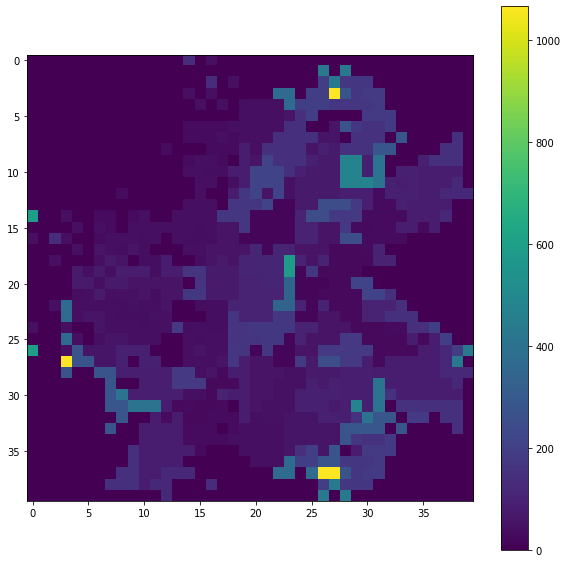

In [53]:
import matplotlib.pyplot as plt

for _, row in df[["longBinGroup", "latBinGroup", "density"]].iterrows():
    i = min(int(row["longBinGroup"]), 39)
    j = min(int(row["latBinGroup"]), 39)

    x[-j, i] = row["density"]
    
plt.figure(figsize=(10, 10))
plt.imshow(x)
plt.colorbar()

In [54]:
!pip install --upgrade folium

     |████████████████████████████████| 92kB 95kB/s eta 0:00:01


In [57]:
import folium

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

marker = folium.CircleMarker(location=[40.738, -73.98])

marker.add_to(folium_map)

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("data/dataset_1_key_with_population.csv")
df

,Unnamed: 0,station_id,station_name,station_latitude,station_longitude,ntaPopulation,ntaCode,noStationsInNTA,ntaNormPopulation,binGroup,binIndexLat,binIndexLong,NTACode,Shape_Area,density
0,0,72,W 52 St & 11 Ave,40.767272,-73.993929,45884,MN15,15,3058.933333,1168,40.766771,-73.991899,MN15,1.836215e+07,166.589068
1,1,448,W 37 St & 10 Ave,40.756604,-73.997901,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068
2,2,449,W 52 St & 9 Ave,40.764618,-73.987895,45884,MN15,15,3058.933333,1128,40.762477,-73.987202,MN15,1.836215e+07,166.589068
3,3,478,11 Ave & W 41 St,40.760301,-73.998842,45884,MN15,15,3058.933333,1085,40.758183,-73.996597,MN15,1.836215e+07,166.589068
4,4,479,9 Ave & W 45 St,40.760193,-73.991255,45884,MN15,15,3058.933333,1086,40.758183,-73.991899,MN15,1.836215e+07,166.589068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,3885,Onderdonk Ave & Gates Ave,40.704130,-73.907370,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999
1092,1092,3886,Menahan St & Onderdonk Ave,40.705530,-73.909600,69317,QN20,11,6301.545455,612,40.706655,-73.907345,QN20,5.049518e+07,124.794999
1093,1093,3895,Cypress Ave & Palmetto St,40.701573,-73.908763,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999
1094,1094,3896,Madison St & Seneca Ave,40.701830,-73.906250,69317,QN20,11,6301.545455,571,40.702361,-73.907345,QN20,5.049518e+07,124.794999


In [103]:
import numpy as np

In [104]:
!ls data

dataset_1.csv
dataset_1_key.csv
dataset_1_key_with_population.csv
K_m.npy
K_sd.npy
New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv
nyc-population.csv
nynta.csv


In [106]:
Km = np.load("data/K_m_R=1.5.npy")
Km.shape

(40, 40, 27)

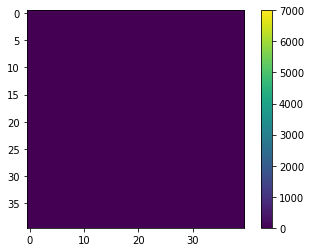

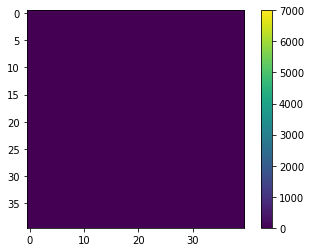

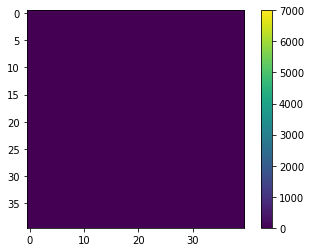

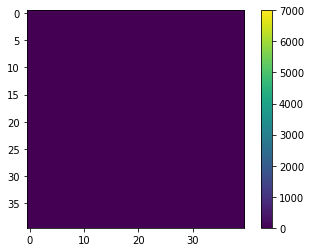

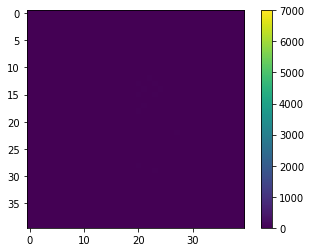

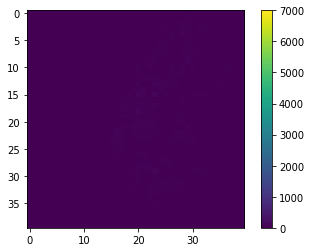

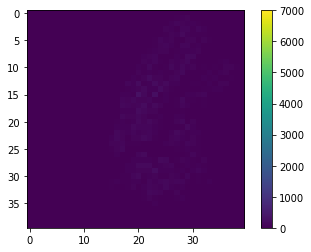

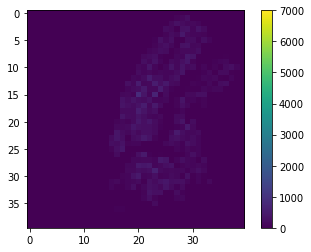

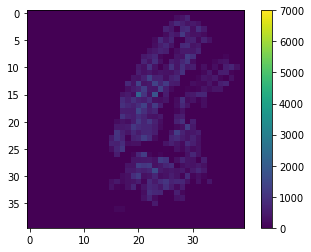

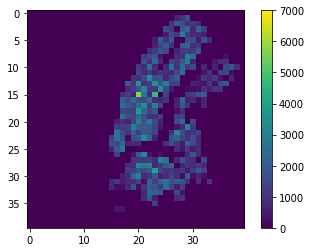

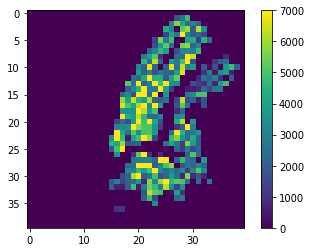

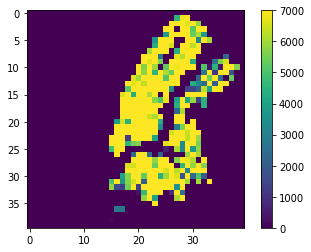

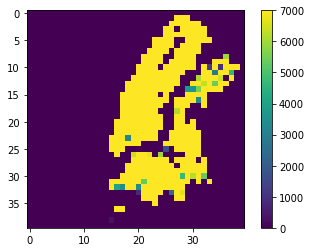

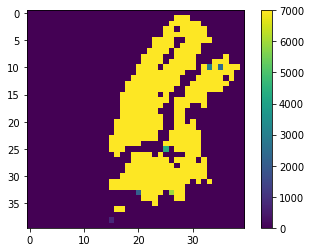

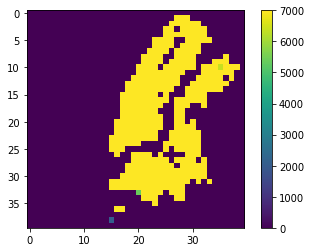

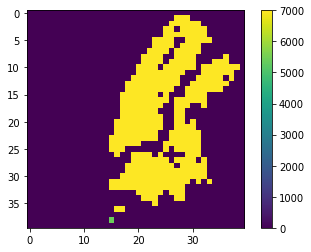

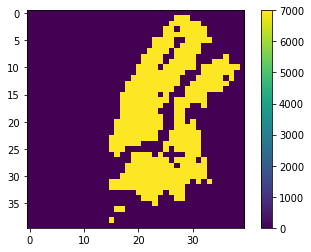

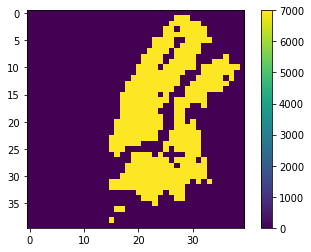

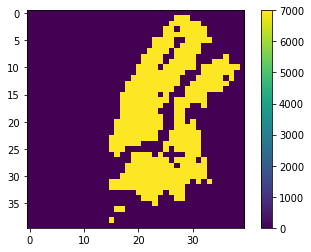

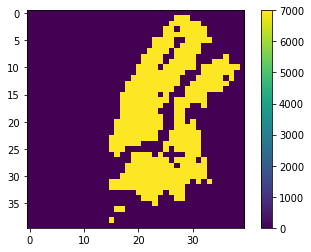

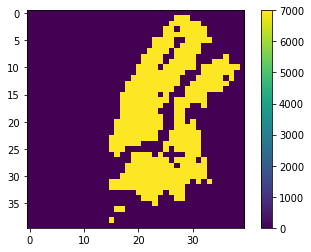

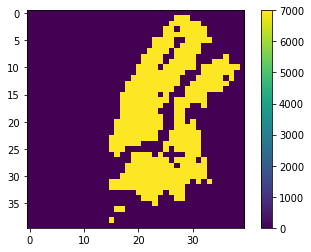

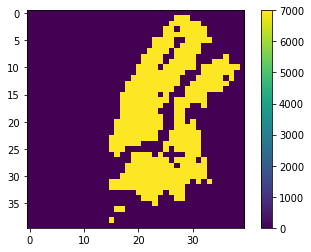

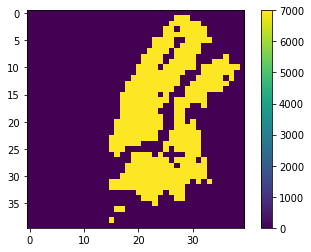

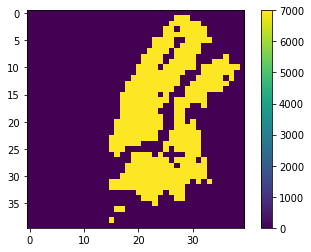

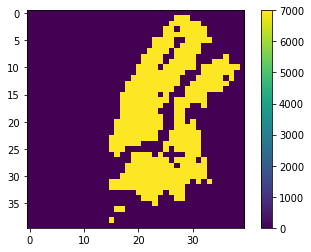

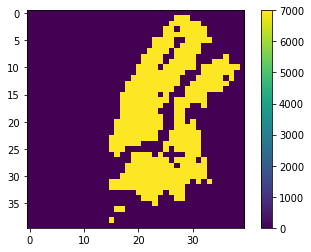

In [113]:
for t in range(27):
    plt.imshow(Km[:, :, t], vmax=7000)
    plt.colorbar()
    plt.show()

In [121]:
longspace = np.linspace(-74.09, -73.9, 40)
latspace = np.linspace(40.64, 40.82, 40)

In [138]:
np.flip(longspace)

array([-73.9       , -73.90487179, -73.90974359, -73.91461538,
       -73.91948718, -73.92435897, -73.92923077, -73.93410256,
       -73.93897436, -73.94384615, -73.94871795, -73.95358974,
       -73.95846154, -73.96333333, -73.96820513, -73.97307692,
       -73.97794872, -73.98282051, -73.98769231, -73.9925641 ,
       -73.9974359 , -74.00230769, -74.00717949, -74.01205128,
       -74.01692308, -74.02179487, -74.02666667, -74.03153846,
       -74.03641026, -74.04128205, -74.04615385, -74.05102564,
       -74.05589744, -74.06076923, -74.06564103, -74.07051282,
       -74.07538462, -74.08025641, -74.08512821, -74.09      ])

In [186]:
Km[:, :, 0].max()

100.0

In [239]:
folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=11,
                            tiles="CartoDB dark_matter")

mat = Km[:, :, -1]
    
for i, long in enumerate(longspace[:-1]):
    for j, lat in enumerate(np.flip(latspace[:-1])):
        rad = mat[j, i]

#         if rad >= 0:
        marker = folium.CircleMarker(location=[lat, long], radius=3, color='blue')
        marker.add_to(folium_map)   

display(folium_map)

In [219]:
!ls data

 dataset_1.csv
 dataset_1_key.csv
 dataset_1_key_with_population.csv
 K_m.npy
'K_m_R=1.5.npy'
'K_m_R=1-Copy1.5_1.npy'
'K_m_R=2.6.npy'
'K_m_R=2-Copy1.6_1.npy'
'K_m_R=2-Copy1.6_3c.npy'
 K_sd.npy
'K_sd_R=1.5.npy'
'K_sd_R=1-Copy1.5_1.npy'
'K_sd_R=2.6.npy'
'K_sd_R=2-Copy1.6_1.npy'
'K_sd_R=2-Copy1.6_3c.npy'
 New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv
 nyc-population.csv
 nynta.csv


In [287]:
np.log2(100)

6.643856189774724

In [294]:
Km = np.load("data/K_m_R=2-Copy1.6_1.npy")

for t in range(0, 27, 3):
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=11,
                            tiles="CartoDB dark_matter")

    mat = Km[:, :, t]
    
    for i, long in enumerate(longspace[:-1]):
        for j, lat in enumerate(np.flip(latspace[:-1])):
            rad = mat[j, i]
            
#             rad = rad/mat.sum()
            
            if rad >= 1:
                rad = np.log2(rad)
#                 if rad > 30:
#                     rad /= 10
                marker = folium.CircleMarker(location=[lat, long], radius=rad, color='red')
                marker.add_to(folium_map)   
            
    display(folium_map)


In [280]:
Km.shape

(40, 40, 27)

In [289]:
Km = np.load("data/K_m_R=1-Copy1.5_1.npy")

for t in range(0, 27, 3):
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=11,
                            tiles="CartoDB dark_matter")

    mat = Km[:, :, t]
    
    for i, long in enumerate(longspace[:-1]):
        for j, lat in enumerate(np.flip(latspace[:-1])):
            rad = mat[j, i]
            
#             rad = rad/mat.sum()
            
            if rad >= 1:
                rad = np.log2(rad)
#                 if rad > 30:
#                     rad /= 10
                marker = folium.CircleMarker(location=[lat, long], radius=rad, color='red')
                marker.add_to(folium_map)   
            
    display(folium_map)


In [274]:
Km[:, :, 1].max()

8.09

In [129]:
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
from folium import plugins

beatufiul subplots

<ErrorbarContainer object of 3 artists>

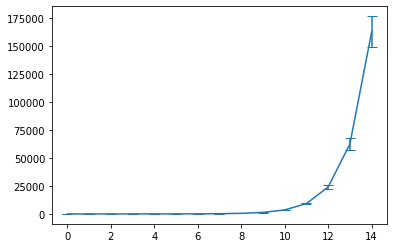

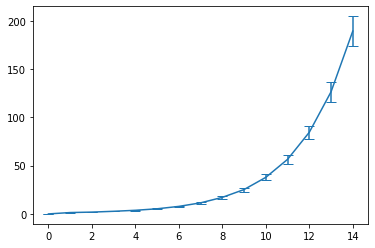

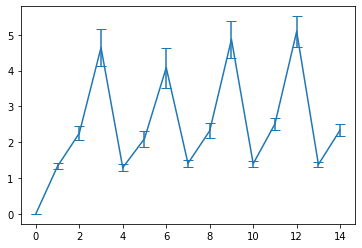

In [227]:
K_m = np.load('data/K_m_R=2-Copy1.6_1.npy')
K_sd = np.load('data/K_sd_R=2-Copy1.6_1.npy')
K_m1 = np.load('data/K_m_R=1-Copy1.5_1.npy')
K_sd1 = np.load('data/K_sd_R=1-Copy1.5_1.npy')
K_m2 = np.load('data/K_m_R=2-Copy1.6_3c.npy')
K_sd2 = np.load('data/K_sd_R=2-Copy1.6_3c.npy')
t = range(15)
plt.figure()
plt.errorbar(t, y=K_m[19, 20, :15], yerr=K_sd[19, 19, :15], capsize=5)
plt.figure()
plt.errorbar(t, y=K_m1[19, 20, :15], yerr=K_sd1[19, 19, :15], capsize=5)
plt.figure()
plt.errorbar(t, y=K_m2[19, 20, :15], yerr=K_sd2[19, 19, :15], capsize=5)

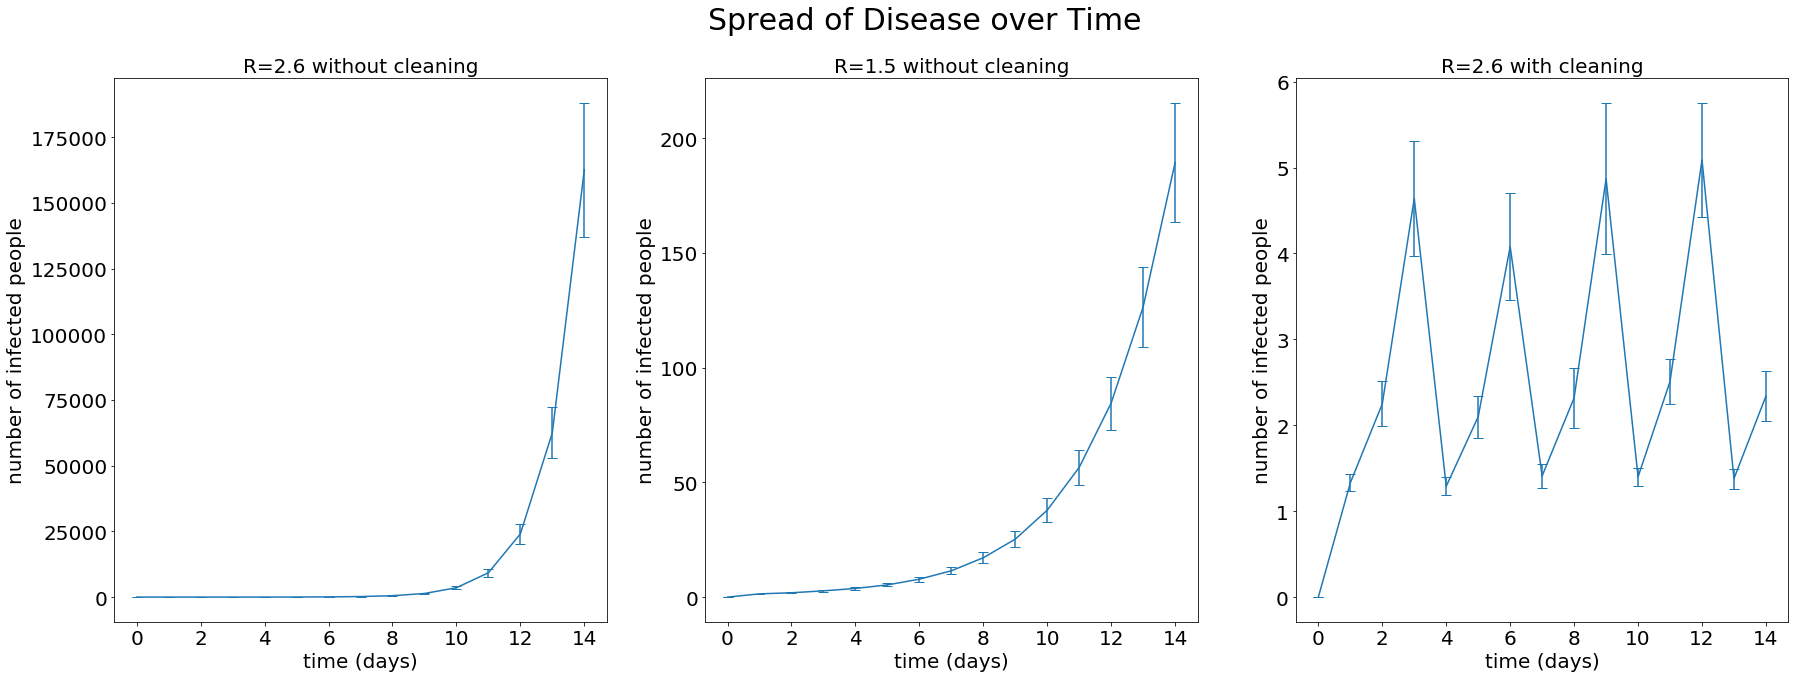

In [263]:
# Create four polar axes and access them through the returned array
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('Spread of Disease over Time', fontsize=30)

axs[0].errorbar(t, y=K_m[19, 20, :15], yerr=K_sd[19, 20, :15], capsize=5)
axs[0].set_title("R=2.6 without cleaning", fontsize=20)
axs[0].set_xlabel("time (days)", fontsize=20)
axs[0].set_ylabel("number of infected people", fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)

axs[1].errorbar(t, y=K_m1[19, 20, :15], yerr=K_sd1[19, 20, :15], capsize=5)
axs[1].set_title("R=1.5 without cleaning", fontsize=20)
axs[1].set_xlabel("time (days)", fontsize=20)
axs[1].set_ylabel("number of infected people", fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[2].errorbar(t, y=K_m2[19, 20, :15], yerr=K_sd2[19, 20, :15], capsize=5)
axs[2].set_title("R=2.6 with cleaning", fontsize=20)
axs[2].set_xlabel("time (days)", fontsize=20)
axs[2].set_ylabel("number of infected people", fontsize=20)
axs[2].tick_params(axis='both', which='major', labelsize=20)

# # Share a Y axis with each row of subplots
# plt.subplots(2, 2, sharey='row')

# # Share both X and Y axes with all subplots
# plt.subplots(2, 2, sharex='all', sharey='all')

# # Note that this is the same as
# plt.subplots(2, 2, sharex=True, sharey=True)


In [77]:
import time

In [84]:
# folium_map = folium.Map(location=[40.738, -73.98],
#                         zoom_start=11.5,
#                         tiles="CartoDB dark_matter")

for j in range(10):
    
    folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=11.5,
                        tiles="CartoDB dark_matter")

    for _, row in df.iterrows():
        lat = row["binIndexLat"]
        long = row["binIndexLong"]

        marker = folium.CircleMarker(location=[lat, long], radius=j + row["density"]/20)
        marker.add_to(folium_map)

    folium_map.save("pics/{}.html".format(j))

In [115]:
from IPython.display import IFrame

# IFrame(src='./nice.html', width=700, height=600)

In [88]:
for i in range(10):
    display(IFrame(src='pics/{}.html'.format(i), width=700, height=600))

In [80]:
import matplotlib.pyplot as plt

In [81]:
!ls pics

0.png  1.png  2.png  3.png  4.png  5.png  6.png  7.png	8.png  9.png


In [83]:
import matplotlib.image as mpimg


for i in range(10):
    filename = "pics/{}.png".format(i)
    img=mpimg.imread(filename)
    
    plt.imshow(img)
    plt.show()

ValueError: invalid PNG header

In [89]:
!pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.0.2-cp37-none-any.whl size=6595 sha256=99ea9d9c92c0ee5918bfb831f6438e5ea28995af29b5b8863028e738ce518d11
  Stored in directory: /home/eek31/.cache/pip/wheels/64/34/8e/1719358e8263f9f33217b9f11d1a70d9e122b75afa5732f032
Successfully built imgkit


In [91]:
import imgkit

In [102]:
with open('pics/1.html') as f:
    imgkit.from_file(f, 'out.jpg')

OSError: wkhtmltoimage reported an error:
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
[>                                                           ] 0%[======>                                                     ] 11%[=========================>                                  ] 42%[=============================>                              ] 49%[=================================>                          ] 55%[============================================================] 100%Rendering (2/2)                                                    
[>                                                           ] 0%[===============>                                            ] 25%Error: Will not output an empty image                             
QPainter::begin: Paint device returned engine == 0, type: 3
QPainter::translate: Painter not active
QPainter::setRenderHint: Painter must be active to set rendering hints
QPainter::setBrush: Painter not active
QPainter::pen: Painter not active
QPainter::setPen: Painter not active
QPainter::end: Painter not active, aborted
Error: Could not save image
[============================================================] 100%Done                                                               
Exit with code 1, due to unknown error.


In [92]:
for i in range(10):
    plt.imshow(imgkit.from_file('pics/{}.html'.format(i), 'out.jpg'))

OSError: No wkhtmltoimage executable found: "b''"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org
